In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.57'

In [1]:
## Load in Fityk data
df_Fyk=pd.read_excel('Fityk_results.xlsx', sheet_name='112820_FULL') 

NameError: name 'pd' is not defined

In [ ]:
df_DF=pd.read_excel('Calibration_fitting.xlsx')
filenames=df_DF['filename_x'].str.replace('_CRR_DiadFit', '')
filenames=filenames.str.replace('-0.04', '')
df_DF['Measurement']=filenames

In [ ]:
combo=pd.merge(df_Fyk, df_DF, on='Measurement', how='left')

In [ ]:
plt.plot(combo['sec since midnight'], combo['Charlotte_Ne_Factor']-
         combo['Ne_Correction'], 
         'ok')

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot([1281, 1287], [1281, 1287], '-r')
ax1.plot(combo['Diad1_Voigt_Cent'], combo['1285cm-1'],
               '.k')
ax2.plot(combo['Diad1_Voigt_Cent'], combo['Diad1_Voigt_Cent']-combo['1285cm-1'],
               '.k')
import matplotlib.ticker as ticker
ax2.ticklabel_format(style='plain', axis='y')


In [67]:
combo.columns

Index(['Date', 'time', 'Measurement', '1285cm-1', '1389cm-1',
       '∆CO2 uncorr (cm-1)', '∆CO2 corr (cm-1-Lam)', 'P(Mpa)', 'P(Median-MPa)',
       'P(MAD-MPa)', 'T(ID)', 'T(median)', 'T(mad)', 'Density  (g/ml)',
       '1122cm-1', '1225cm-1', '1453cm-1', '∆Ne-m (cm-1)', '∆Ne-r (cm-1)',
       '1122 r (cm-1)', '1225 r (cm-1)', '1453 r (cm-1)', 'Comments',
       'neon for corr', 'Charlotte_Ne_Factor', 'Unnamed: 0.1', 'Unnamed: 0',
       'Corrected_Splitting', 'filename_x', 'Splitting', 'Diad1_Combofit_Cent',
       'Diad1_Combofit_Height', 'Diad1_Voigt_Cent', 'Diad1_Voigt_Area',
       'Diad1_Voigt_Sigma', 'Diad1_Residual', 'Diad1_Prop_Lor', 'Diad1_fwhm',
       'Diad1_refit', 'Diad2_Combofit_Cent', 'Diad2_Combofit_Height',
       'Diad2_Voigt_Cent', 'Diad2_Voigt_Area', 'Diad2_Voigt_Sigma',
       'Diad2_Voigt_Gamma', 'Diad2_Residual', 'Diad2_Prop_Lor', 'Diad2_fwhm',
       'Diad2_refit', 'HB1_Cent', 'HB1_Area', 'HB1_Sigma', 'HB2_Cent',
       'HB2_Area', 'HB2_Sigma', 'C13_Cent', 'C1

In [68]:
combo['neon for corr']

0     NE20
1     NE21
2     NE22
3     NE23
4     NE24
5     NE25
6     NE26
7     NE27
8     NE28
9     NE29
10    NE30
11    NE31
12    NE32
13    NE33
14    NE34
15    NE35
16    NE36
17    NE37
18    NE38
19    NE39
20    NE40
21    NE41
22    NE42
23    NE43
24    NE44
25    NE45
26    NE46
27    NE47
28    NE48
29    NE49
30    NE50
31    NE51
32    NE52
33    NE53
34    NE54
35    NE55
36    NE56
37    NE56
38    NE58
39    NE58
40    NE59
41    NE61
42    NE62
43    NE63
44    NE64
45    NE65
46    NE66
47    NE67
48    NE68
49    NE69
50    NE70
51    NE71
52    NE72
53    NE74
54    NE76
55    NE77
Name: neon for corr, dtype: object

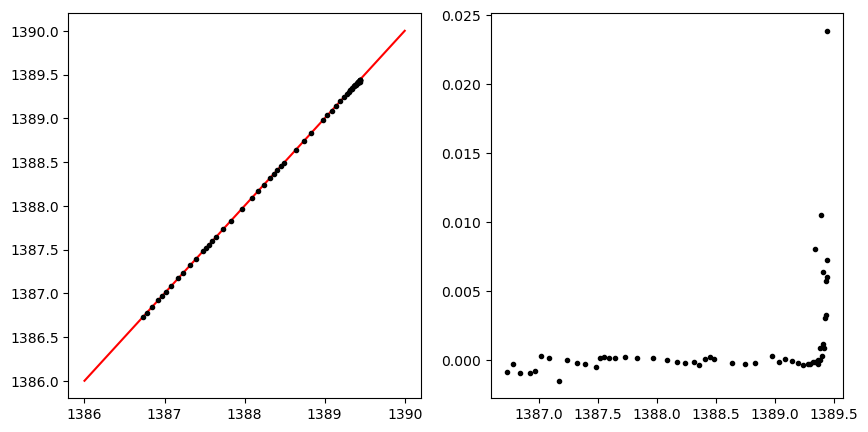

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot([1386, 1390], [1386, 1390], '-r')
ax1.plot(combo['Diad2_Voigt_Cent'], combo['1389cm-1'],
               '.k')
ax2.plot(combo['Diad2_Voigt_Cent'], combo['Diad2_Voigt_Cent']-combo['1389cm-1'],
               '.k')

## Splitting (Uncorrected)

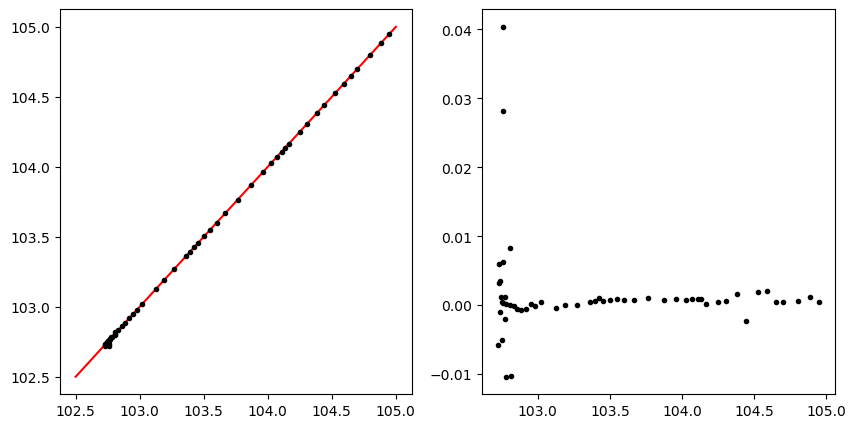

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot([102.5, 105], [102.5, 105], '-r')
ax1.plot(combo['Splitting'], combo['∆CO2 uncorr (cm-1)'],
               '.k')
ax2.plot(combo['Splitting'], combo['Splitting']-combo['∆CO2 uncorr (cm-1)'],
               '.k')

## Splitting (Corrected)
- Bigger difference as we use regression of Ne lines vs time, not side-by-side

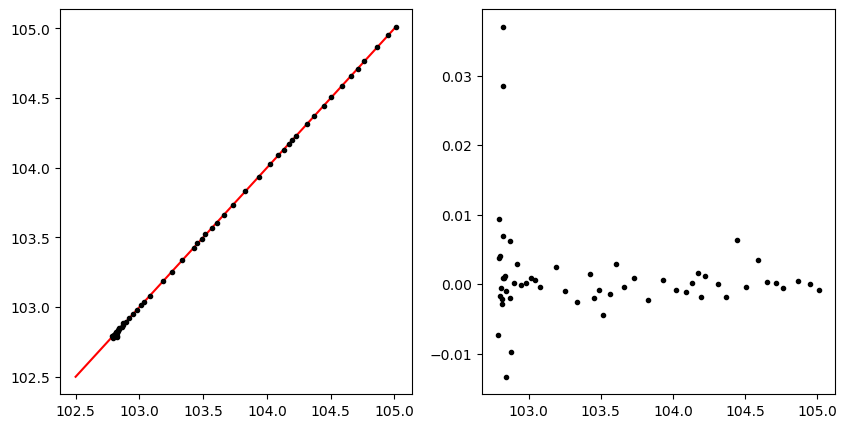

In [71]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot([102.5, 105], [102.5, 105], '-r')
ax1.plot(combo['Corrected_Splitting'], combo['∆CO2 corr (cm-1-Lam)'],
               '.k')
ax2.plot(combo['Corrected_Splitting'], combo['Corrected_Splitting']-combo['∆CO2 corr (cm-1-Lam)'],
               '.k')

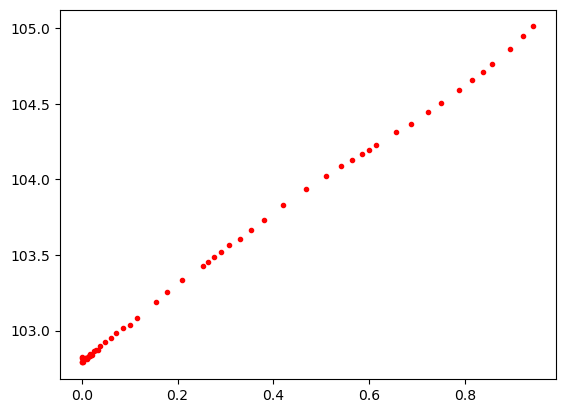

In [72]:
plt.plot(combo['Density  (g/ml)'], combo['Corrected_Splitting'],
               '.r')

In [73]:
combo.loc[combo['Density  (g/ml)']>0.75]

,Date,time,Measurement,1285cm-1,1389cm-1,∆CO2 uncorr (cm-1),∆CO2 corr (cm-1-Lam),P(Mpa),P(Median-MPa),P(MAD-MPa),...,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,Ne_Correction
0,2020-11-28,17:52:07,POC1,1281.7841,1386.7315,104.9474,105.011502,34.251,34.253304,0.000696,...,28,NaN,10,5,5,"['0h', '0m', '52s']",5:52:07 PM\n,64327,1341,1.000599
1,2020-11-28,18:04:56,POC2,1281.8904,1386.7760,104.8856,104.949506,30.100,30.102432,0.000654,...,28,NaN,15,5,5,"['0h', '1m', '17s']",6:04:56 PM\n,65096,1341,1.000599
2,2020-11-28,18:12:40,POC3,1282.0383,1386.8396,104.8013,104.864202,25.090,25.098817,0.001313,...,28,NaN,15,5,5,"['0h', '1m', '17s']",6:12:40 PM\n,65560,1341,1.000599
3,2020-11-28,18:17:17,POC4,1282.2229,1386.9228,104.6999,104.763597,20.100,20.119464,0.000659,...,28,NaN,15,5,5,"['0h', '1m', '17s']",6:17:17 PM\n,65837,1341,1.000599
4,2020-11-28,18:22:17,POC5,1282.3161,1386.9649,104.6488,104.711737,18.060,18.052581,0.000744,...,28,NaN,15,5,5,"['0h', '1m', '17s']",6:22:17 PM\n,66137,1341,1.000599
5,2020-11-28,18:26:42,POC6,1282.4242,1387.0150,104.5908,104.655096,16.050,16.055856,0.000487,...,28,NaN,15,5,5,"['0h', '1m', '17s']",6:26:42 PM\n,66402,1341,1.000599
6,2020-11-28,18:30:47,POC7,1282.5583,1387.0847,104.5264,104.587332,14.050,14.057654,0.001270,...,28,NaN,15,5,5,"['0h', '1m', '17s']",6:30:47 PM\n,66647,1341,1.000598


(-0.01, 0.1)

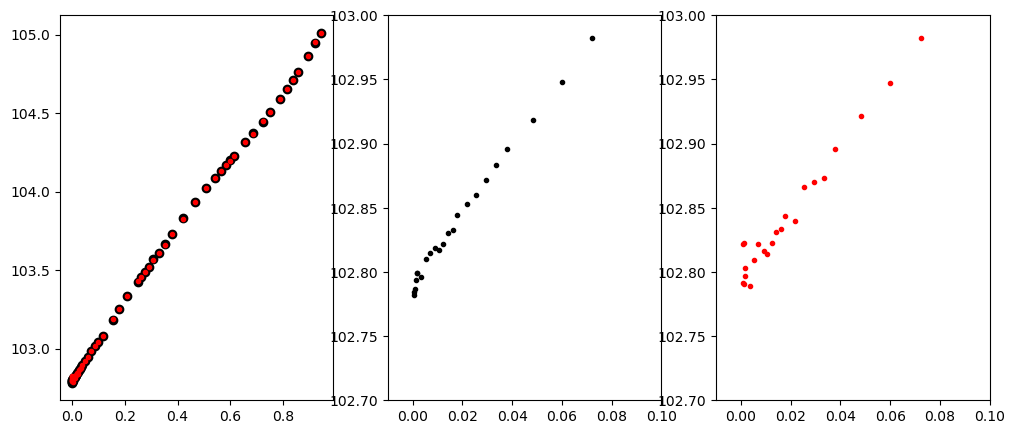

In [74]:
## Regression of Pressure vs. splitting
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,5))
#ax1.plot([102.5, 105], [102.5, 105], '-r')
ax1.plot(combo['Density  (g/ml)'], combo['∆CO2 corr (cm-1-Lam)'],
               'ok')
ax1.plot(combo['Density  (g/ml)'], combo['Corrected_Splitting'],
               '.r')

ax2.plot(combo['Density  (g/ml)'], combo['∆CO2 corr (cm-1-Lam)'],
               '.k')
ax3.plot(combo['Density  (g/ml)'], combo['Corrected_Splitting'],
               '.r')
ax2.set_ylim([102.7, 103])
ax2.set_xlim([-0.01, 0.1])
ax3.set_ylim([102.7, 103])
ax3.set_xlim([-0.01, 0.1])

In [75]:
combo.loc[(combo['Corrected_Splitting']-combo['∆CO2 corr (cm-1-Lam)'])<-0.005]

,Date,time,Measurement,1285cm-1,1389cm-1,∆CO2 uncorr (cm-1),∆CO2 corr (cm-1-Lam),P(Mpa),P(Median-MPa),P(MAD-MPa),...,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,Ne_Correction
37,2020-11-28,22:31:51,POC38,1286.4811,1389.3024,102.8213,102.883013,1.79,1.797662,0.000534,...,28,NaN,45,3,5,"['0h', '2m', '16s']",10:31:51 PM\n,81111,1341,1.000605
40,2020-11-28,22:54:43,POC41,1286.5554,1389.3430,102.7876,102.852812,1.20,1.201548,0.000342,...,28,NaN,45,3,5,"['0h', '2m', '16s']",10:54:43 PM\n,82483,1341,1.000606
49,2020-11-29,1900-01-01 00:09:49,POC50,1286.6844,1389.4162,102.7318,102.796105,0.20,0.200760,0.000307,...,29,NaN,45,5,5,"['0h', '3m', '46s']",12:09:42 AM\n,86982,1341,1.000611
